# Code to read images from FVC2006 DB2_A

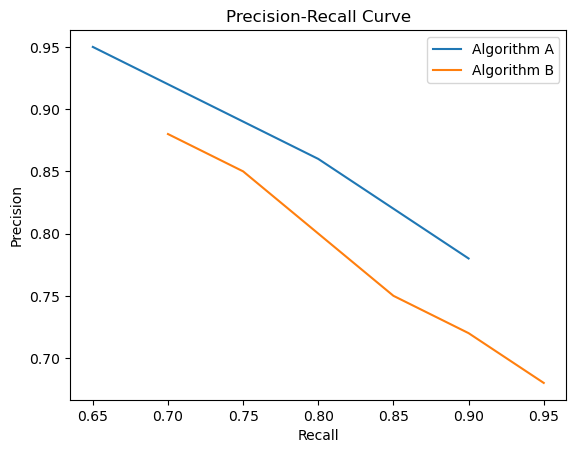

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Sample precision and recall values for Algorithm A and Algorithm B
precision_algoA = [0.95, 0.92, 0.89, 0.86, 0.82, 0.78]
recall_algoA = [0.65, 0.70, 0.75, 0.80, 0.85, 0.90]

precision_algoB = [0.88, 0.85, 0.80, 0.75, 0.72, 0.68]
recall_algoB = [0.70, 0.75, 0.80, 0.85, 0.90, 0.95]

# Plot the precision-recall curve for Algorithm A
plt.plot(recall_algoA, precision_algoA, label='Algorithm A')

# Plot the precision-recall curve for Algorithm B
plt.plot(recall_algoB, precision_algoB, label='Algorithm B')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Show the plot
plt.show()


In [1]:
import cv2
import os
# Get the path to the images
images_path = '/home/rs/21CS91R01/research/2023_ICVGIP-Code/datasets/FVC2006DB2_A'

# List the images in the folder
images = os.listdir(images_path)

# # Iterate over the images
# for image in images:
#   # Read the image
#   image = cv2.imread(os.path.join(images_path, image))

#   # Display the image
#   # cv2_imshow(image)
#   cv2.waitKey(0)

In [2]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

2023-07-31 18:00:55.218365: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import cv2
import numpy as np

def random_distortion(image):
    rows, cols = image.shape[:2]
    # Define the distortion parameters
    random_scale = np.random.uniform(0.8, 1.2)
    random_angle = np.random.uniform(-15, 15)
    random_translation = np.random.uniform(-10, 10, (2,))
    # Apply the distortion
    M = cv2.getRotationMatrix2D((cols/2, rows/2), random_angle, random_scale)
    M[:, 2] += random_translation
    distorted_image = cv2.warpAffine(image, M, (cols, rows))
    # print(distorted_image.shape)
    return distorted_image

def random_gaussian_blurring(image):
    # Generate random blurring parameters
    random_sigma = np.random.uniform(0, 2.0)
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (0, 0), random_sigma)
    # print(blurred_image.shape)
    return blurred_image

def random_rotation(image):
    rows, cols = image.shape[:2]
    # Generate random rotation angle
    random_angle = np.random.uniform(-30, 30)
    # Apply rotation
    M = cv2.getRotationMatrix2D((cols/2, rows/2), random_angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    # print(rotated_image.shape)
    return rotated_image

def random_scaling(image):
    rows, cols = image.shape[:2]
    # Generate random scaling factor
    random_scale = np.random.uniform(0.8, 1.2)
    # Apply scaling
    scaled_image = cv2.resize(image, (int(cols*random_scale), int(rows*random_scale)))
    scaled_image = cv2.resize(scaled_image, (cols, rows))
    # print(scaled_image.shape)
    return scaled_image

def random_contrast(image):
    # Generate random contrast factor
    random_factor = np.random.uniform(0.5, 1.5)
    # Apply contrast adjustment
    adjusted_image = np.clip(image * random_factor, 0, 255).astype(np.uint8)
    # print(adjusted_image.shape)
    return adjusted_image

def random_noise(image):
    # Generate random noise parameters
    random_mean = 0
    random_std = np.random.uniform(0, 30)
    # Apply Gaussian noise
    noise = np.random.normal(random_mean, random_std, image.shape).astype(np.uint8)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    # print(noisy_image.shape)
    return noisy_image

def random_morphology(image):
    # Generate random kernel size for morphology operations
    kernel_size = np.random.randint(2, 7)
    # Generate random morphology operation
    morph_op = np.random.choice([cv2.MORPH_OPEN, cv2.MORPH_CLOSE])
    # Create the kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    # Apply morphology operation
    morph_image = cv2.morphologyEx(image, morph_op, kernel)
    # print(morph_image.shape)
    return morph_image



In [3]:
# processed_images_path = '/home/rs/21CS91R01/research/2023_ICVGIP-Code/datasets/processed_images_path'
# if not os.path.exists(processed_images_path):
#     os.mkdir(processed_images_path)

# List to store preprocessed images
preprocessed_images_train = []
labels_train = []

preprocessed_images_test = []
labels_test = []

# Iterate over the images
for image_name in os.listdir(images_path):
    if image_name.endswith('.bmp'):
        # Extract the label from the image name without considering variations
        image_name_ex = image_name.split('.')[0]
        print(image_name_ex)
        image_no = image_name_ex.split('_')[0]
        print(image_no)
        index =image_name_ex.split('_')[1]
        print(index)


        # Read the image
        image_path = os.path.join(images_path, image_name)
        image = cv2.imread(image_path)
     
        # Resize the image
        resized_image = cv2.resize(image, (224, 224))

        # Convert the image to grayscale
        # gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Normalize the image
        normalized_image = resized_image
        # distorted_image = random_distortion(resized_image)
        # blurred_image = random_gaussian_blurring(resized_image)
        # rotated_image = random_rotation(resized_image)
        # scaled_image = random_scaling(resized_image)
        # noisy_image = random_noise(resized_image)
        # adjusted_image = random_contrast(resized_image)
        # morphed_image = random_morphology(resized_image)


        # Save the image
        # processed_image_path = os.path.join(processed_images_path, image_name)
        # cv2.imwrite(processed_image_path, normalized_image)

        # Add the preprocessed image and label to the lists
        if (int(index) >= 5 and int(index) <= 12):
            preprocessed_images_train.append(np.array(normalized_image))
            # preprocessed_images_train.append(np.array(distorted_image))
            # preprocessed_images_train.append(np.array(blurred_image))
            # preprocessed_images_train.append(np.array(rotated_image))
            # preprocessed_images_train.append(np.array(scaled_image))
            # preprocessed_images_train.append(np.array(adjusted_image))
            # preprocessed_images_train.append(np.array(noisy_image))
            # preprocessed_images_train.append(np.array(morphed_image))
            labels_train.append(image_no)
            # for _ in range(7):
            #     labels_train.append(image_no)
       
         
        else:
            preprocessed_images_test.append(normalized_image)
            labels_test.append(image_no)
            # preprocessed_images_test.extend([distorted_image, blurred_image, rotated_image, scaled_image,adjusted_image,noisy_image,morphed_image])
            # for _ in range(7):
            #     labels_test.append(image_no)
    # break

        
       
        

12_9
12
9
94_12
94
12
70_6
70
6
35_6
35
6
95_1
95
1
128_3
128
3
88_10
88
10
23_11
23
11
14_10
14
10
100_4
100
4
19_1
19
1
121_11
121
11
75_11
75
11
59_5
59
5
51_4
51
4
137_12
137
12
75_8
75
8
133_10
133
10
93_9
93
9
51_10
51
10
125_6
125
6
38_11
38
11
90_7
90
7
9_11
9
11
57_10
57
10
62_1
62
1
50_2
50
2
78_11
78
11
14_3
14
3
99_6
99
6
70_8
70
8
1_7
1
7
2_9
2
9
42_12
42
12
102_11
102
11
82_2
82
2
106_3
106
3
136_12
136
12
95_2
95
2
59_2
59
2
46_4
46
4
19_10
19
10
111_5
111
5
21_1
21
1
130_8
130
8
26_3
26
3
115_4
115
4
127_6
127
6
134_1
134
1
138_6
138
6
79_9
79
9
73_8
73
8
132_4
132
4
78_7
78
7
127_9
127
9
134_2
134
2
40_5
40
5
41_5
41
5
39_8
39
8
31_2
31
2
10_1
10
1
79_4
79
4
135_9
135
9
96_2
96
2
96_11
96
11
106_1
106
1
48_6
48
6
97_1
97
1
137_1
137
1
17_1
17
1
24_4
24
4
124_11
124
11
101_3
101
3
93_1
93
1
42_7
42
7
92_5
92
5
57_7
57
7
27_2
27
2
46_10
46
10
128_8
128
8
29_7
29
7
49_10
49
10
120_1
120
1
129_1
129
1
82_3
82
3
56_7
56
7
84_1
84
1
126_7
126
7
88_4
88
4
16_2
16
2
46_8
46
8


In [4]:
# Convert the list of preprocessed images to a NumPy array

preprocessed_images_train = np.array(preprocessed_images_train)
preprocessed_images_test = np.array(preprocessed_images_test)
print(preprocessed_images_train.shape)
print(preprocessed_images_test.shape)

(1120, 224, 224, 3)
(559, 224, 224, 3)


In [5]:
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)
print(labels_train.shape)
print(labels_test.shape)

(1120,)
(559,)


In [6]:
# Convert labels to numerical labels
label_encoder = LabelEncoder()
numerical_labels_train = label_encoder.fit_transform(labels_train)
numerical_labels_test = label_encoder.fit_transform(labels_test)


# Convert numerical labels to one-hot encoded format
one_hot_labels_train = to_categorical(numerical_labels_train)
one_hot_labels_test = to_categorical(numerical_labels_test)

print(one_hot_labels_train)
print("-========")
print(one_hot_labels_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-========
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
epochs = 10
batch_size = 16
margin = 1  # Margin for constrastive loss.
x_train = preprocessed_images_train
y_train = one_hot_labels_train
x_test = preprocessed_images_test
y_test = one_hot_labels_test

In [80]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [8]:
print(f"{x_train.shape=}")
print(f"{y_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_test.shape=}")

x_train.shape=(1120, 224, 224, 3)
y_train.shape=(1120, 140)
x_test.shape=(559, 224, 224, 3)
y_test.shape=(559, 140)


In [14]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224,224,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    
    return model

In [40]:
model1 = createModel()
batch_size = 128
epochs = 30
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(x_train, y_train,
              batch_size=32,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')  # Assuming there are 10 unique labels
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(preprocessed_images_train, one_hot_labels_train, epochs=50, batch_size=32)

# Extract features from the preprocessed images using the trained CNN model
features = model.predict(preprocessed_images_test)

# Print the shape of the extracted features
print("Extracted Features Shape:", features.shape)


In [46]:
test_loss, test_accuracy = model.evaluate(preprocessed_images_test, one_hot_labels_test)


10/10 [==============================] - 3s 193ms/step - loss: 15.6867 - accuracy: 0.0300


In [15]:
#https://blog.paperspace.com/attention-mechanisms-in-computer-vision-cbam/
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10

import numpy as np
import os

In [21]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

def attach_attention_module(net, attention_module):
  if attention_module == 'se_block': # SE_block
    net = se_block(net)
  elif attention_module == 'cbam_block': # CBAM_block
    net = cbam_block(net)
  else:
    raise Exception("'{}' is not supported attention module!".format(attention_module))

  return net

def se_block(input_feature, ratio=8):
	"""Contains the implementation of Squeeze-and-Excitation(SE) block.
	As described in https://arxiv.org/abs/1709.01507.
	"""
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature

def cbam_block(cbam_feature, ratio=8):
	"""Contains the implementation of Convolutional Block Attention Module(CBAM) block.
	As described in https://arxiv.org/abs/1807.06521.
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool.shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature.shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature.shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool.shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool.shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat.shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature.shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])
		
	

In [13]:
# %%
from tensorflow.keras.models import load_model

# Define the path where the model was saved
model_path = '/home/rs/21CS91R01/research/2023_ICVGIP-Code/baseline1/models/resnet_cbam.h5'

# Load the model using TensorFlow/Keras's load_model function
loaded_model = load_model(model_path)

# Now you can use the loaded_model to make predictions or continue training

# Score trained model.
scores = loaded_model.evaluate(x_test, y_test)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

NameError: Exception encountered when calling layer "lambda" (type Lambda).

name 'K' is not defined

Call arguments received by layer "lambda" (type Lambda):
  • inputs=tf.Tensor(shape=(None, 224, 224, 16), dtype=float32)
  • mask=None
  • training=None

In [22]:
"""
ResNet v1
This is a revised implementation from Cifar10 ResNet example in Keras:
(https://github.com/keras-team/keras/blob/master/examples/cifar10_resnet.py)
[a] Deep Residual Learning for Image Recognition
https://arxiv.org/pdf/1512.03385.pdf
"""

from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import tensorflow as tf


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)
    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
        x= Dropout(0.5)(x)
    return x


def resnet_v1(input_shape, depth, num_classes=140, attention_module=None):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            # attention_module
            if attention_module is not None:
                y = attach_attention_module(y, attention_module)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
            # x= Dropout(0.5)(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    # print(y.shape)https://stackoverflow.com/questions/69802548/how-to-print-keras-tensor-values/69806679#69806679
    
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [23]:
# Training parameters
batch_size = 128
epochs = 50
data_augmentation = False
num_classes = 10
subtract_pixel_mean = True  # Subtracting pixel mean improves accuracy
base_model = 'resnet20'
# Choose what attention_module to use: cbam_block / se_block / None
attention_module = 'se_block'
model_type = base_model if attention_module==None else base_model+'_'+attention_module

In [18]:
# Input image dimensions.
input_shape = x_train.shape[1:]
# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [19]:


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (1120, 224, 224, 3)
1120 train samples
559 test samples
y_train shape: (1120, 140)


In [24]:
from tensorflow.keras.models import Model
from keras.layers import Input
depth = 20 # For ResNet, specify the depth (e.g. ResNet50: depth=50)
model = resnet_v1(input_shape=input_shape, depth=depth, attention_module='cbam_block')

In [25]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()


Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 224, 224, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 224, 224, 16  64         ['conv2d_3[0][0]']               
 rmalization)                   )                                       

/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                                                  
 multiply_1 (Multiply)          (None, 224, 224, 16  0           ['multiply[0][0]',               
                                )                                 'conv2d_6[0][0]']               
                                                                                                  
 add_1 (Add)                    (None, 224, 224, 16  0           ['activation_2[0][0]',           
                                )                                 'multiply_1[0][0]']             
                                                                                                  
 activation_5 (Activation)      (None, 224, 224, 16  0           ['add_1[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_7 

In [27]:
resnet_model = model.fit(x_train, y_train,
              batch_size=64,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
18/18 [==============================] - 543s 30s/step - loss: 5.7436 - accuracy: 0.0063 - val_loss: 5.1383 - val_accuracy: 0.0072
Epoch 2/50
18/18 [==============================] - 500s 29s/step - loss: 4.7108 - accuracy: 0.0598 - val_loss: 5.3857 - val_accuracy: 0.0072
Epoch 3/50
18/18 [==============================] - 483s 27s/step - loss: 3.4366 - accuracy: 0.2723 - val_loss: 19.3630 - val_accuracy: 0.0072
Epoch 4/50
18/18 [==============================] - 490s 28s/step - loss: 1.9856 - accuracy: 0.5241 - val_loss: 15.8641 - val_accuracy: 0.0143
Epoch 5/50
18/18 [==============================] - 440s 25s/step - loss: 1.0970 - accuracy: 0.7366 - val_loss: 13.6311 - val_accuracy: 0.0161
Epoch 6/50
18/18 [==============================] - 491s 28s/step - loss: 0.6182 - accuracy: 0.8661 - val_loss: 14.1396 - val_accuracy: 0.0483
Epoch 7/50
18/18 [==============================] - 502s 28s/step - loss: 0.3863 - accuracy: 0.9402 - val_loss: 12.2375 - val_accuracy: 0.0877
E

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

18/18 [==============================] - 741s 40s/step - loss: 28.0828 - accuracy: 0.0394
Test loss: 28.082801818847656
Test accuracy: 0.03935599327087402


In [ ]:
https://www.datacamp.com/tutorial/convolutional-neural-networks-python
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [23]:

### Hyper-Parameters

epochs = 10
lr = 1e-4
optimizer = Adam(learning_rate=lr) #lr = 1e-4,
# optimizer = RMSprop(learning_rate=lr) #lr = 1e-5
# optimizer = SGD(learning_rate=lr) #lr = 1e-2
# optimizer = tfa.optimizers.SGDW(learning_rate=lr, momentum=0.9, nesterov=True, weight_decay=1e-4) #lr = 1e-3
batch_size = 50
input_shape = x_test.shape
input_shape = (224,224,3)
output_num_units = 140

In [28]:

import os
import re
import sys
import time
import datetime
import math
import pandas as pd
import numpy as np
import cv2
import random
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Layer, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from tensorflow.keras.metrics import Precision, Recall, TruePositives
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, \
EarlyStopping, CSVLogger
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.nn import local_response_normalization #, conv2d

# import tensorflow_probability as tfp
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import keras.backend as K
from typing import Any, List, Tuple, Union

In [37]:
class Localization(tf.keras.layers.Layer):
    def __init__(self, 
                 filters_1: int, 
                 filters_2: int, 
                 fc_units: int, 
                 kernel_size=(5,5),
                 pool_size=(2,2),
                 name='localization', 
                 **kwargs):
        super(Localization, self).__init__(**kwargs)
        self.filters_1 = filters_1
        self.filters_2 = filters_2
        self.fc_units = fc_units
        self.kernel_size = kernel_size
        self.pool_size = pool_size
        self.network = keras.Sequential(
            [
                MaxPooling2D(pool_size=pool_size, name=name+'_mp_1'),
                Conv2D(filters=filters_1, 
                       kernel_size=kernel_size, 
                       padding='same', 
                       strides=1, 
                       activation='relu',
                       name=name+'_c_1'),
                MaxPooling2D(pool_size=pool_size, name=name+'_mp_2'),
                Conv2D(filters=filters_2, 
                       kernel_size=kernel_size, 
                       padding='same', 
                       strides=1, 
                       activation='relu',
                       name=name+'_c_2'),
                MaxPooling2D(pool_size=pool_size, name=name+'_mp_3'),
                Flatten(name=name+'_fl'),
                Dense(fc_units, activation='relu', name=name+'_d_1'),
                Dense(6, activation=None, 
                      bias_initializer=tf.keras.initializers.constant\
                      ([1.0, 0.0, 0.0, 0.0, 1.0, 0.0]), 
                      kernel_initializer='zeros',
                      name=name+'_d_2'),
            ]
        )

    def build(self, input_shape):
        print("Building Localization Network with input shape:", input_shape)

    def compute_output_shape(self, input_shape):
        return [None, 6]

    def call(self, inputs):
        theta = self.network(inputs)
        theta = tf.keras.layers.Reshape((2, 3))(theta)
        return theta

    def get_config(self):
        config = super(Localization, self).get_config()
        config.update({
            'filters_1': self.filters_1,
            'filters_2': self.filters_2,
            'fc_units': self.fc_units,
            'kernel_size': self.kernel_size,
            'pool_size': self.pool_size,
        })
        return config

In [28]:
class BilinearInterpolation(tf.keras.layers.Layer):
    def __init__(self, height=48, width=48):
        super(BilinearInterpolation, self).__init__()
        self.height = height
        self.width = width

    def compute_output_shape(self, input_shape):
        return [None, self.height, self.width, 1]

    def get_config(self):
        return {
            'height': self.height,
            'width': self.width,
        }
    
    def build(self, input_shape):
        print("Building Bilinear Interpolation Layer with input shape:", input_shape)

    def advance_indexing(self, inputs, x, y):
        '''
        Utility function to get pixel value for coordinate
        vectors x and y from a  4D tensor image.
        '''        
        shape = tf.shape(inputs)
        batch_size, _, _ = shape[0], shape[1], shape[2]
        
        batch_idx = tf.range(0, batch_size)
        batch_idx = tf.reshape(batch_idx, (batch_size, 1, 1))
        b = tf.tile(batch_idx, (1, self.height, self.width))
        indices = tf.stack([b, y, x], 3)
        return tf.gather_nd(inputs, indices)

    def call(self, inputs):
        images, theta = inputs
        sampling_grid = self.grid_generator(batch=tf.shape(images)[0])
        return self.interpolate(images, sampling_grid, theta)

    def grid_generator(self, batch):
        '''
        This function returns a sampling grid, which when
        used with the bilinear sampler on the input feature
        map, will create an output feature map that is an
        affine transformation of the input feature map.
        '''
        # create normalized 2D grid
        x = tf.linspace(-1, 1, self.width)
        y = tf.linspace(-1, 1, self.height)
        # x and y are selected in the range of -1 to 1 so the the transformation happens considering the center
        # of the image as the origin. The images will be later scaled up.
        xx, yy = tf.meshgrid(x, y)
            
        # flatten
        xx = tf.reshape(xx, (-1,))
        yy = tf.reshape(yy, (-1,))

        # reshape to [x_t, y_t , 1] - (homogeneous form)
        homogenous_coordinates = tf.stack([xx, yy, tf.ones_like(xx)])
        # # repeat grid num_batch times
        # sampling_grid = np.resize(sampling_grid, (num_batch, 3, H*W))
        # repeat grid num_batch times
        homogenous_coordinates = tf.expand_dims(homogenous_coordinates, axis=0)
        homogenous_coordinates = tf.tile(homogenous_coordinates, tf.stack([batch, 1, 1]))
        # homogenous_coordinates = tf.tile(homogenous_coordinates, [batch, 1, 1])

        # cast to float32 (required for matmul)
        homogenous_coordinates = tf.cast(homogenous_coordinates, dtype=tf.float32)

        return homogenous_coordinates
    
    def interpolate(self, images, grid, theta):
        '''
        Performs bilinear sampling of the input images according to the
        normalized coordinates provided by the sampling grid. Note that
        the sampling is done identically for each channel of the input.
        '''

        with tf.name_scope("Transformation"):
            # transform the sampling grid - batch multiply
            transformed = tf.matmul(theta, grid)
            # batch grid has shape (num_batch, 2, H*W)

            # reshape to (num_batch, H, W, 2)
            transformed = tf.transpose(transformed, perm=[0, 2, 1])
            transformed = tf.reshape(transformed, [-1, self.height, self.width, 2])
                
            x_transformed = transformed[:, :, :, 0]
            y_transformed = transformed[:, :, :, 1]
                
            # rescale x and y to [0, W-1/H-1]
            x = ((x_transformed + 1.) * tf.cast(self.width, dtype=tf.float32)) * 0.5
            y = ((y_transformed + 1.) * tf.cast(self.height, dtype=tf.float32)) * 0.5

        with tf.name_scope("VariableCasting"):
            # grab 4 nearest corner points for each (x_i, y_i)
            x0 = tf.cast(tf.math.floor(x), dtype=tf.int32)
            x1 = x0 + 1
            y0 = tf.cast(tf.math.floor(y), dtype=tf.int32)
            y1 = y0 + 1

            # clip to range [0, H-1/W-1] to not violate img boundaries
            x0 = tf.clip_by_value(x0, 0, self.width-1)
            x1 = tf.clip_by_value(x1, 0, self.width-1)
            y0 = tf.clip_by_value(y0, 0, self.height-1)
            y1 = tf.clip_by_value(y1, 0, self.height-1)
            x = tf.clip_by_value(x, 0, tf.cast(self.width, dtype=tf.float32)-1.0)
            y = tf.clip_by_value(y, 0, tf.cast(self.height, dtype=tf.float32)-1)

        with tf.name_scope("AdvanceIndexing"):
            # get pixel value at corner coords
            Ia = self.advance_indexing(images, x0, y0)
            Ib = self.advance_indexing(images, x0, y1)
            Ic = self.advance_indexing(images, x1, y0)
            Id = self.advance_indexing(images, x1, y1)

        with tf.name_scope("Interpolation"):
            # recast as float for delta calculation
            x0 = tf.cast(x0, dtype=tf.float32)
            x1 = tf.cast(x1, dtype=tf.float32)
            y0 = tf.cast(y0, dtype=tf.float32)
            y1 = tf.cast(y1, dtype=tf.float32)
                            
            # calculate deltas
            wa = (x1-x) * (y1-y)
            wb = (x1-x) * (y-y0)
            wc = (x-x0) * (y1-y)
            wd = (x-x0) * (y-y0)

            # add dimension for addition
            wa = tf.expand_dims(wa, axis=3)
            wb = tf.expand_dims(wb, axis=3)
            wc = tf.expand_dims(wc, axis=3)
            wd = tf.expand_dims(wd, axis=3)
                        
        return tf.math.add_n([wa*Ia + wb*Ib + wc*Ic + wd*Id])

In [40]:

def conv_block(filters, kernel_size, pool_size=(2, 2), name='zcmn'):
    def layer_fn(x):
        zeropad = ZeroPadding2D(padding=2, 
                                name=name+'_zp')(x)
        conv = Conv2D(filters=filters, 
                    kernel_size=kernel_size, 
                    padding='valid', 
                    strides=1, 
                    activation='relu', 
                    name=name+'_c')(zeropad)   
        maxpool = MaxPooling2D(pool_size=pool_size, 
                                strides=2, 
                                padding='valid',
                                name=name+'_mp')(conv)       
        norm = local_response_normalization(maxpool, name=name+'_lrn')

        return norm
    return layer_fn

def STN(input_shape=input_shape, num_classes=output_num_units):
    image = Input(shape=input_shape)
    theta = Localization(250, 250, 250, name='localization_0')(image)
    spatial_transformer_network_1 = BilinearInterpolation(height=input_shape[0], 
                                                          width=input_shape[1])([image, theta])    
    conv_1 = conv_block(200, (7,7), name='zcmn_0')(spatial_transformer_network_1)
    theta = Localization(150, 200, 300, name='localization_1')(conv_1)
    spatial_transformer_network_2 = BilinearInterpolation(height=23, 
                                                          width=23)([conv_1, theta])        
    conv_2 = conv_block(250, (4,4), name='zcmn_1')(spatial_transformer_network_2)
    theta = Localization(150, 200, 300, name='localization_2')(conv_2)
    spatial_transformer_network_3 = BilinearInterpolation(height=12, 
                                                          width=12)([conv_2, theta])         
    conv_3 = conv_block(350, (4,4), name='zcmn_2')(spatial_transformer_network_3)
    flatten = Flatten()(conv_3)
    dense = Dense(units= 400, activation='relu')(flatten)
    predictions = Dense(units=num_classes, activation='softmax')(dense)

    model = Model(inputs=image, outputs=predictions)
    return model
 
     

In [41]:
model = STN()
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

model.summary()
    

Building Localization Network with input shape: (None, 224, 224, 3)
Building Bilinear Interpolation Layer with input shape: [TensorShape([None, 224, 224, 3]), TensorShape([None, 2, 3])]
Building Localization Network with input shape: (None, 111, 111, 200)
Building Bilinear Interpolation Layer with input shape: [TensorShape([None, 111, 111, 200]), TensorShape([None, 2, 3])]
Building Localization Network with input shape: (None, 12, 12, 250)
Building Bilinear Interpolation Layer with input shape: [TensorShape([None, 12, 12, 250]), TensorShape([None, 2, 3])]
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                         

In [42]:
  #Train model
hist = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                  
                    batch_size=batch_size)  

Epoch 1/10
23/23 [==============================] - 244s 10s/step - loss: 4.9449 - accuracy: 8.9286e-04
Epoch 2/10
23/23 [==============================] - 236s 10s/step - loss: 4.9417 - accuracy: 0.0063
Epoch 3/10
23/23 [==============================] - 236s 10s/step - loss: 4.9417 - accuracy: 0.0071
Epoch 4/10
23/23 [==============================] - 237s 10s/step - loss: 4.9417 - accuracy: 0.0071
Epoch 5/10
23/23 [==============================] - 235s 10s/step - loss: 4.9417 - accuracy: 0.0054
Epoch 6/10
23/23 [==============================] - 238s 10s/step - loss: 4.9417 - accuracy: 0.0054
Epoch 7/10
23/23 [==============================] - 237s 10s/step - loss: 4.9417 - accuracy: 0.0071
Epoch 8/10
23/23 [==============================] - 236s 10s/step - loss: 4.9417 - accuracy: 0.0071
Epoch 9/10
23/23 [==============================] - 235s 10s/step - loss: 4.9417 - accuracy: 0.0071
Epoch 10/10
23/23 [==============================] - 238s 10s/step - loss: 4.9417 - accuracy: 0.

In [51]:
### Hyper-Parameters
epochs = 10
lr = 1e-3
optimizer = Adam(learning_rate=lr) #lr = 1e-3
# optimizer = RMSprop(learning_rate=lr) #lr = 1e-3
# optimizer = SGD(learning_rate=lr) #1e-1 
# optimizer = tfa.optimizers.SGDW(learning_rate=lr, momentum=0.9, nesterov=True, weight_decay=1e-4) #lr = 1e-2

batch_size = 50
num_classes = 140
input_shape = x_test.shape
input_shape = (224,224,3)
# input_shape = (48, 48, 3)
image_size = input_shape[0]  # We'll resize input images to this size
patch_size = 4 # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 32
num_heads = 6
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 4
mlp_head_units = [512, 256]  # Size of the dense layers of the final classifier

In [52]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = Dense(units, activation=tf.nn.gelu)(x)
        x = Dropout(dropout_rate)(x)
    return x

In [53]:

class Patches(Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

    def get_config(self):
        return {
            'patch_size': self.patch_size,
        }

In [46]:
class PatchEncoder(Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.projection = Dense(units=projection_dim)
        self.position_embedding = Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    def get_config(self):
        return {
            'num_patches': self.num_patches,
            'projection_dim': self.projection_dim,
        }

In [54]:
# https://github.com/fanisspr/traffic-sign-recognition/blob/master/ipynb/CNN_with_STNs-DFG.ipynb
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomRotation(factor=0.02),
        tf.keras.layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
 

In [55]:
def create_vit_classifier():
    inputs = Input(shape=input_shape)
    # # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = Flatten()(representation)
    representation = Dropout(0.5)(representation) 
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = Dense(num_classes, activation='softmax')(features)
    # Create the Keras model.
    model = Model(inputs=inputs, outputs=logits)
    return model

In [56]:
model = create_vit_classifier()
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 224, 224, 3)  0          ['input_14[0][0]']               
                                                                                                  
 patches_1 (Patches)            (None, None, 48)     0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder_1 (PatchEncoder)  (None, 3136, 32)    101920      ['patches_1[0][0]']        

In [58]:
  #Train model
hist = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                  
                    batch_size=batch_size)  

Epoch 1/10


2023-06-29 15:45:43.115093: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (mklcpu) ran out of memory trying to allocate 10.99GiB (rounded to 11801395200)requested by op model_9/multi_head_attention_5/einsum/Einsum
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-06-29 15:45:43.115187: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for mklcpu
2023-06-29 15:45:43.115214: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-06-29 15:45:43.115229: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-06-29 15:45:43.115243: I tensorflow/tsl/framework

ResourceExhaustedError: Graph execution error:

Detected at node 'model_9/multi_head_attention_5/einsum/Einsum' defined at (most recent call last):
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_3182346/2668463021.py", line 2, in <module>
      hist = model.fit(x_train,
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 595, in call
      attention_output, attention_scores = self._compute_attention(
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 524, in _compute_attention
      attention_scores = tf.einsum(self._dot_product_equation, key, query)
Node: 'model_9/multi_head_attention_5/einsum/Einsum'
OOM when allocating tensor with shape[50,6,3136,3136] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node model_9/multi_head_attention_5/einsum/Einsum}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_66762]

In [ ]:
test_loss, test_accuracy = model.evaluate(preprocessed_images_test, one_hot_labels_test)

In [70]:
from keras.applications import ResNet50
from keras import regularizers
from keras.models import *
from keras.layers import *


img_shape = (224, 224, 3)
inputs = Input(img_shape)
num_classes = 100

resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=img_shape)
outputs = resnet50.output
outputs = BatchNormalization()(outputs)
outputs = GlobalAveragePooling2D()(outputs)
outputs= Dropout(0.5)(outputs)
outputs= Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(outputs)
outputs= Dropout(0.5)(outputs)
outputs = Dense(num_classes, activation = 'softmax')(outputs)
model = Model(inputs = resnet50.input, outputs = outputs)

# transfer learning freeze all convolutional  layers
for layer in resnet50.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [71]:
model.fit(preprocessed_images_train, one_hot_labels_train, epochs=50,batch_size=32)

Epoch 1/50
16/16 [==============================] - 334s 20s/step - loss: 4.8816 - accuracy: 0.0060
Epoch 2/50
16/16 [==============================] - 345s 22s/step - loss: 4.5974 - accuracy: 0.0220
Epoch 3/50
16/16 [==============================] - 329s 20s/step - loss: 4.4741 - accuracy: 0.0480
Epoch 4/50
16/16 [==============================] - 342s 21s/step - loss: 4.2808 - accuracy: 0.0920
Epoch 5/50
16/16 [==============================] - 340s 21s/step - loss: 4.0545 - accuracy: 0.1120
Epoch 6/50
16/16 [==============================] - 334s 21s/step - loss: 3.9533 - accuracy: 0.1360
Epoch 7/50
16/16 [==============================] - 337s 21s/step - loss: 3.8108 - accuracy: 0.1780
Epoch 8/50
16/16 [==============================] - 335s 21s/step - loss: 3.5748 - accuracy: 0.2100
Epoch 9/50
16/16 [==============================] - 337s 21s/step - loss: 3.3596 - accuracy: 0.2500
Epoch 10/50
16/16 [==============================] - 334s 21s/step - loss: 3.2463 - accuracy: 0.2520

In [72]:
test_loss, test_accuracy = model.evaluate(preprocessed_images_test, one_hot_labels_test)

10/10 [==============================] - 194s 19s/step - loss: 2.7572 - accuracy: 0.3667


In [13]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras.models import *
from keras.optimizers import *

IMG_SIZE = 224
img_shape = (IMG_SIZE, IMG_SIZE, 3)
inputs = Input(img_shape)
num_classes = 140

vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape= img_shape)
vgg19_model.trainable = False
outputs = vgg19_model(inputs)
outputs = BatchNormalization(name = 'BatchNormalization')(outputs)
outputs = GlobalAveragePooling2D()(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(256)(outputs)
outputs = LeakyReLU(alpha=0.1)(outputs)
outputs = Dropout(0.25)(outputs)
outputs = Dense(num_classes, activation = 'softmax')(outputs)

model = Model(inputs = [inputs], outputs = [outputs])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 BatchNormalization (BatchNo  (None, 7, 7, 512)        2048      
 rmalization)                                                    
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1313

In [14]:
model.fit(preprocessed_images_train, one_hot_labels_train, epochs=50,batch_size=32)

Epoch 1/10
374/374 [==============================] - 129s 341ms/step - loss: 4.6813 - accuracy: 0.0473
Epoch 2/10
374/374 [==============================] - 128s 342ms/step - loss: 3.2637 - accuracy: 0.2786
Epoch 3/10
374/374 [==============================] - 130s 346ms/step - loss: 2.1703 - accuracy: 0.4598
Epoch 4/10
374/374 [==============================] - 128s 343ms/step - loss: 1.5545 - accuracy: 0.5964
Epoch 5/10
374/374 [==============================] - 129s 346ms/step - loss: 1.2912 - accuracy: 0.6571
Epoch 6/10
374/374 [==============================] - 126s 338ms/step - loss: 0.9954 - accuracy: 0.7170
Epoch 7/10
374/374 [==============================] - 129s 344ms/step - loss: 0.8689 - accuracy: 0.7652
Epoch 8/10
374/374 [==============================] - 136s 364ms/step - loss: 0.7393 - accuracy: 0.7875
Epoch 9/10
374/374 [==============================] - 126s 338ms/step - loss: 0.6971 - accuracy: 0.8054
Epoch 10/10
374/374 [==============================] - 128s 342m

In [15]:
test_loss, test_accuracy = model.evaluate(preprocessed_images_test, one_hot_labels_test)

18/18 [==============================] - 43s 2s/step - loss: 0.4137 - accuracy: 0.8857


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model((224,224,3), num_classes=100)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
import keras
from keras.models import Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_75 (Conv2D)             (None, 112, 112, 12  3584        ['rescaling_2[0][0]']            
                                8)                                                                
                                                                                            

In [54]:
model.fit(preprocessed_images_train, one_hot_labels_train, epochs=50, batch_size=32)

Epoch 1/50
16/16 [==============================] - 89s 5s/step - loss: 5.0606 - accuracy: 0.0060
Epoch 2/50
16/16 [==============================] - 83s 5s/step - loss: 4.6566 - accuracy: 0.0220
Epoch 3/50
16/16 [==============================] - 84s 5s/step - loss: 4.3952 - accuracy: 0.0340
Epoch 4/50
16/16 [==============================] - 84s 5s/step - loss: 4.1305 - accuracy: 0.0500
Epoch 5/50
16/16 [==============================] - 83s 5s/step - loss: 3.7951 - accuracy: 0.0920
Epoch 6/50
16/16 [==============================] - 83s 5s/step - loss: 3.6054 - accuracy: 0.1100
Epoch 7/50
16/16 [==============================] - 83s 5s/step - loss: 3.3787 - accuracy: 0.1520
Epoch 8/50
16/16 [==============================] - 83s 5s/step - loss: 3.1388 - accuracy: 0.2020
Epoch 9/50
16/16 [==============================] - 83s 5s/step - loss: 2.9464 - accuracy: 0.2420
Epoch 10/50
16/16 [==============================] - 86s 5s/step - loss: 2.7146 - accuracy: 0.3180
Epoch 11/50
16/16 [

In [55]:
test_loss, test_accuracy = model.evaluate(preprocessed_images_test, one_hot_labels_test)

2023-07-13 14:16:34.313201: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'model_2/add_8/add' exist for missing node 'model_2/add_7/add'.
2023-07-13 14:16:34.385548: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'model_2/add_8/add' exist for missing node 'model_2/add_7/add'.


10/10 [==============================] - 80s 8s/step - loss: 2.8060 - accuracy: 0.2900


Mobilenet

In [85]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import numpy as np # linear algebra
import keras.backend as K 
import time as ti 
import cv2
import os
import glob # for including images
import scipy.io as sio
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras import models
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.python.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, AveragePooling2D  
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.python.keras.optimizers import RMSprop, SGD, Adadelta, Adam 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import MobileNetV2

In [86]:
model = MobileNetV2(input_shape=(224, 224, 1), alpha=1, weights=None,classes=140)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  288         ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [80]:
input_shape=(224,224,1)
epochs=50

result =model.fit(preprocessed_images_train, one_hot_labels_train, epochs=50, batch_size=32)

Epoch 1/50
35/35 [==============================] - 94s 2s/step - loss: 5.1423 - accuracy: 0.0098
Epoch 2/50
35/35 [==============================] - 81s 2s/step - loss: 4.2785 - accuracy: 0.0491
Epoch 3/50
35/35 [==============================] - 81s 2s/step - loss: 3.7234 - accuracy: 0.1009
Epoch 4/50
35/35 [==============================] - 80s 2s/step - loss: 2.9112 - accuracy: 0.2339
Epoch 5/50
35/35 [==============================] - 80s 2s/step - loss: 2.2615 - accuracy: 0.3580
Epoch 6/50
35/35 [==============================] - 80s 2s/step - loss: 1.7196 - accuracy: 0.5080
Epoch 7/50
35/35 [==============================] - 81s 2s/step - loss: 1.2219 - accuracy: 0.6429
Epoch 8/50
35/35 [==============================] - 78s 2s/step - loss: 0.8206 - accuracy: 0.7830
Epoch 9/50
35/35 [==============================] - 79s 2s/step - loss: 0.6759 - accuracy: 0.8134
Epoch 10/50
35/35 [==============================] - 79s 2s/step - loss: 0.4186 - accuracy: 0.9036
Epoch 11/50
35/35 [

In [82]:
test_loss, test_accuracy = model.evaluate(preprocessed_images_test, one_hot_labels_test)

18/18 [==============================] - 69s 4s/step - loss: 11.6394 - accuracy: 0.0071


In [71]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop


In [74]:
input_img = Input(shape = (224,224, 1))
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)#decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded
autoencoder = Model(input_img, autoencoder(input_img))

autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(), metrics=['accuracy'])
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_168 (Conv2D)         (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_169 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_170 (Conv2D)         (None, 56, 56, 128)       7385

In [75]:
#Training
batch_size = 128
epochs = 30
autoencoder_train = autoencoder.fit(x_train, x_train, batch_size=batch_size,epochs=epochs,verbose=1)


Epoch 1/30
9/9 [==============================] - 85s 9s/step - loss: 0.0737 - accuracy: 0.0112
Epoch 2/30
9/9 [==============================] - 80s 9s/step - loss: 2.2123e-05 - accuracy: 0.0112
Epoch 3/30
9/9 [==============================] - 86s 10s/step - loss: 5.5401e-06 - accuracy: 0.0112
Epoch 4/30
9/9 [==============================] - 90s 10s/step - loss: 2.7483e-06 - accuracy: 0.0112
Epoch 5/30
9/9 [==============================] - 81s 9s/step - loss: 1.5675e-06 - accuracy: 0.0112
Epoch 6/30
9/9 [==============================] - 75s 8s/step - loss: 9.3442e-07 - accuracy: 0.0112
Epoch 7/30
9/9 [==============================] - 75s 8s/step - loss: 5.6836e-07 - accuracy: 0.0112
Epoch 8/30
9/9 [==============================] - 77s 8s/step - loss: 3.5233e-07 - accuracy: 0.0112
Epoch 9/30
9/9 [==============================] - 76s 8s/step - loss: 2.2326e-07 - accuracy: 0.0112
Epoch 10/30
9/9 [==============================] - 78s 9s/step - loss: 1.4511e-07 - accuracy: 0.0112
E

In [76]:
test_loss, test_accuracy = autoencoder.evaluate(x_test, x_test)

18/18 [==============================] - 11s 570ms/step - loss: 2.2276e-10 - accuracy: 0.0108


In [58]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

#Convolutional block to be used in autoencoder and U-Net
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block for autoencoder (no skip connections)
def decoder_block(input, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = conv_block(x, num_filters)
    return x

#Encoder will be the same for Autoencoder and U-net
#We are getting both conv output and maxpool output for convenience.
#we will ignore conv output for Autoencoder. It acts as skip connections for U-Net
def build_encoder(input_image):
    #inputs = Input(input_shape)

    s1, p1 = encoder_block(input_image, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    
    encoded = conv_block(p3, 256) #Bridge
    
    return encoded

#Decoder for Autoencoder ONLY. 
def build_decoder(encoded):
    d1 = decoder_block(encoded, 128)
    d2 = decoder_block(d1, 64)
    d3 = decoder_block(d2, 32)
     
    decoded = Conv2D(3, 3, padding="same", activation="sigmoid")(d3)
    return decoded

#Use encoder and decoder blocks to build the autoencoder. 
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    autoencoder = Model(input_img, build_decoder(build_encoder(input_img)))
    return(autoencoder)

In [67]:
input_shape = (224,224,3)
model=build_autoencoder(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_141 (Conv2D)         (None, 224, 224, 32)      320       
                                                                 
 batch_normalization_203 (Ba  (None, 224, 224, 32)     128       
 tchNormalization)                                               
                                                                 
 activation_42 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 conv2d_142 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_204 (Ba  (None, 224, 224, 32)     128       
 tchNormalization)                                         

In [68]:
model.fit(x_train, x_train,
        epochs=10,
        shuffle=True)


Epoch 1/10


ValueError: in user code:

    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/losses.py", line 1500, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 224 and 32 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](model_6/conv2d_155/Sigmoid, IteratorGetNext:1)' with input shapes: [32,224,224,3], [32,224,224].


In [87]:
import tensorflow as tf
#https://journalofcloudcomputing.springeropen.com/counter/pdf/10.1186/s13677-020-00203-9.pdf
#https://towardsdatascience.com/building-mobilenet-from-scratch-using-tensorflow-ad009c5dd42c
#import all necessary layers
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model
# MobileNet block
def mobilnet_block (x, filters, strides):
    
    x = DepthwiseConv2D(kernel_size = 3, strides = strides,dilation_rate=3, padding = 'same')(x)
    x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    return x
#stem of the model
input = Input(shape = (224,224,3))
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)
# main part of the model
x = mobilnet_block(x, filters = 64, strides = 1)
x = mobilnet_block(x, filters = 128, strides = 1)
x = mobilnet_block(x, filters = 128, strides = 1)
x = mobilnet_block(x, filters = 256, strides = 1)
x = mobilnet_block(x, filters = 256, strides = 1)
x = mobilnet_block(x, filters = 512, strides = 1)
for _ in range (5):
     x = mobilnet_block(x, filters = 512, strides = 1)
x = mobilnet_block(x, filters = 1024, strides = 1)
x = mobilnet_block(x, filters = 1024, strides = 1)
x = AvgPool2D (pool_size = 7, strides = 1, data_format='channels_first')(x)
output = Dense (units = 140, activation = 'softmax')(x)
model = Model(inputs=input, outputs=output)
model.summary()
#plot the model
# tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_59 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_75 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_54 (ReLU)             (None, 224, 224, 32)      0         
                                                                 
 depthwise_conv2d_52 (Depthw  (None, 224, 224, 32)     320       
 iseConv2D)                                                      
                                                                 
 depthwise_conv2d_53 (Depthw  (None, 224, 224, 32)     320

In [88]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
# Train the model
model.fit(x_train, y_train,
            
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)


Epoch 1/50


ValueError: in user code:

    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 140) and (32, 224, 218, 140) are incompatible
